# Assignment 1 (shortened)

This notebook contains three exercises from the exercise sets we covered prior to moving the teaching online. It will count as one of the two assignments you need to submit to qualify for the exam. **The deadline** for handing in this assignment is **April 3.** You hand in by pushing your solutions to your folder in the exercise repo.

## Problems from exercise set 2
> **Ex. 2.1.1**: The performance of a random forest classifier is highly sensitive to hyper parameters. Therefore, you should be intimately familiar with what the most important ones do. For each point below, explain what the hyper parameter pertaining to `sklearn.ensemble.RandomForestClassifier` controls, and how setting it either too low or too high (or True/False) might hurt model performance:
1. `n_estimators`
2. `max_depth`
3. `max_features`
4. `bootstrap`

***Solution:*** 

 1. `n_estimators` sets the number of trees in the random forest. If we set it too low, we might get a worse estimators (closer to a regular decision tree) averaging over many trees yields less variance, and thus a better estimator. If we set too many trees, the estimator might be very computationally heavy (and the estimator might not improve at some point). 
 2. `max_depth` sets the maximum depth of the decision trees. This control the "pruning" of the tree, so that we control how many sublevels of nodes, that the tree should estimate. If we set it too low, we might an underfitting model, as nodes would not be pure, and if would perform bad on classifying the samples. If we set it too high, we might get an overfitting model as too many leaves would be pure, and the model might perform well on the training data, but poorly on new data. If `max_depth` is set to `None`, the trees would continue until all leaves are pure, and the model might overfit heavily. 
 3. `max_features` sets the number of features to use in the splitting procedure of each tree. It can both be set to an integer, a fraction, the square-root or the log2 of the total number of features. The default is taking the squareroot of the total number of features. If we select many features, we improve the performance of each tree as we can include more important features. However, if we select too many features, we might increase the correlation between the tree, which decrease the strength of the forest as a whole.
 4. `bootstrap` is a Boolean controlling whether the forest should use bootstrap sampling when making the trees. If `False`, the whole dataset is used for each tree. Bootstrap-sampling is powerful, as when we take samples of the data with replacement, we get tree that vary a lot from each other, and thus the forest as a whole will be better performing, and we do not have to rely on assumptions about the distribution of the data. 

> **Ex. 2.1.2**: For `n_estimators > 1`how should one set the hyper-parameters `max_features` and `bootstrap` so that all the trees in the ensemble end up identical?

***Solution:***

If we set the `max_features` to include all features, i.e. the number of columns, and `bootstrap` to `False` i.e. that we do not do bootstrap sampling, we will get n identical trees. 

## Problems from exercise set 3

> **Ex. 3.1.2**: Reproduce the figure from the slides that compares PCA, LDA, t-SNE and UMAP as applied to the digits dataset.
1. Do it for the digits dataset (same as in slides)
2. Do it also for the wine dataset. What problems do you observe if you don't standardize the wine dataset? Why is this not a problem with the digits data?
3. Comment on the differences you observe as well as the applicability (and necessity thereof) of different methods for different data.
>
> *Hint: You can use [this class](https://github.com/ulfaslak/ulf_pytools/blob/7f4f1eb7e2d721851c8dacb20904478b19090f2a/ulf.py#L451) for making coloring easier. It lets you create a function that takes a category as input and returns an associated color. Read the docstring for usage example.*

In [12]:
# import stuff
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.manifold import TSNE
from umap import UMAP
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.datasets import load_digits

# Get wine data
data_wine = load_wine()
X_wine = data_wine['data']
y_wine = data_wine['target']

# Get digits data
data_digits = load_digits()
X_digits = data_digits['data']
y_digits = data_digits['target']

# make function to do dimensionality reduction and plot
def plotDimensionReducer(reducer, X,y,ax, standardize=True):
    if standardize == True:
        ssc = StandardScaler()
        X_ = ssc.fit_transform(X)
    elif standardize == False:
        X_ = X
    
    if reducer == LDA:
        dmap = reducer().fit_transform(X_,y)
    else: 
        dmap = reducer().fit_transform(X_)
        
    d1,d2 = dmap[:,0], dmap[:,1]
    
    ax.scatter(d1,d2, c=y, cmap='cividis')
    ax.set_title(reducer.__name__)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


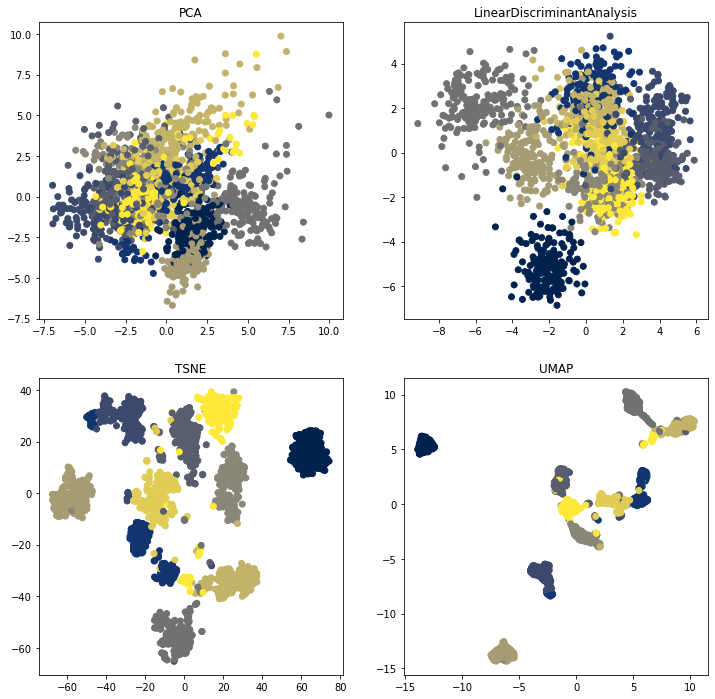

In [13]:
# plot the digits data with standardization
fig,ax = plt.subplots(2,2,figsize = (12,12))
plotDimensionReducer(PCA, X_digits,y_digits, ax[0][0])
plotDimensionReducer(LDA, X_digits,y_digits, ax[0][1])
plotDimensionReducer(TSNE, X_digits, y_digits, ax[1][0])
plotDimensionReducer(UMAP, X_digits,y_digits, ax[1][1])

/opt/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


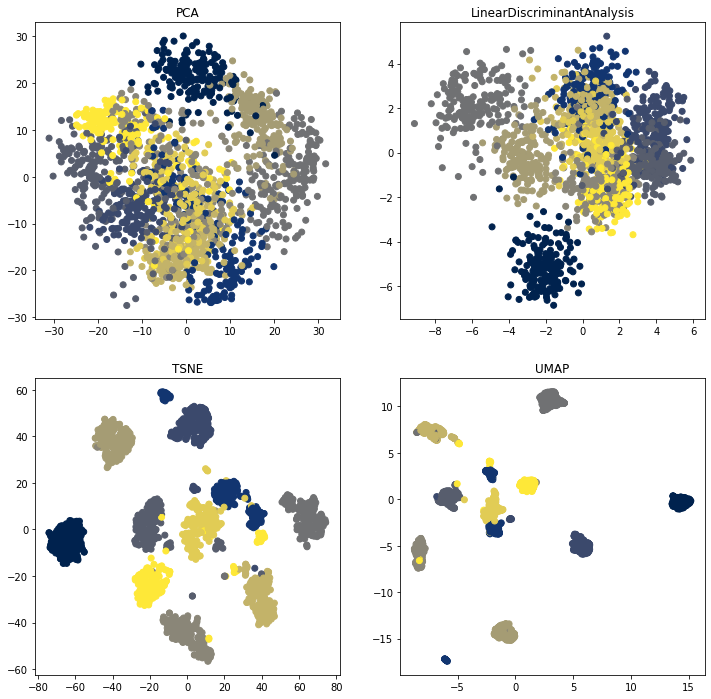

In [14]:
# plot the digits data without standardization
fig,ax = plt.subplots(2,2,figsize = (12,12))
plotDimensionReducer(PCA, X_digits,y_digits, ax[0][0], standardize=False)
plotDimensionReducer(LDA, X_digits,y_digits, ax[0][1], standardize=False)
plotDimensionReducer(TSNE, X_digits, y_digits, ax[1][0], standardize=False)
plotDimensionReducer(UMAP, X_digits,y_digits, ax[1][1], standardize=False)

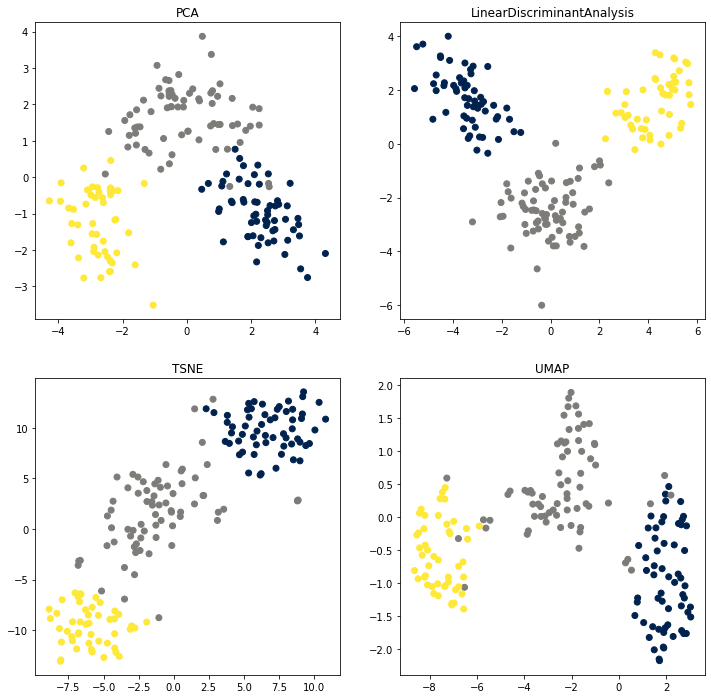

In [15]:
# plot the wine data with standardization
fig,ax = plt.subplots(2,2,figsize = (12,12))
plotDimensionReducer(PCA, X_wine,y_wine, ax[0][0])
plotDimensionReducer(LDA, X_wine,y_wine, ax[0][1])
plotDimensionReducer(TSNE, X_wine, y_wine, ax[1][0])
plotDimensionReducer(UMAP, X_wine,y_wine, ax[1][1])

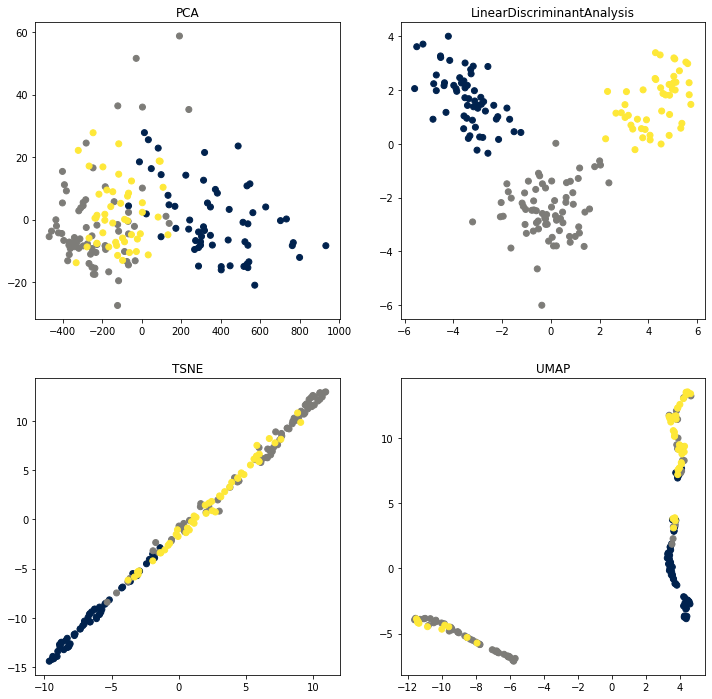

In [16]:
# plot the wine data without standardization
fig,ax = plt.subplots(2,2,figsize = (12,12))
plotDimensionReducer(PCA, X_wine,y_wine, ax[0][0], standardize=False)
plotDimensionReducer(LDA, X_wine,y_wine, ax[0][1], standardize=False)
plotDimensionReducer(TSNE, X_wine, y_wine, ax[1][0], standardize=False)
plotDimensionReducer(UMAP, X_wine,y_wine, ax[1][1], standardize=False)

***Solution:***

When we don't standardize the wine data, we see that PCA, TSNE and UMAP perform bad. The features in the wine data have very different scales of measurement. PCA, TSNE and UMAP depend on measure the distance of the samples, and that is difficult when the features have different scales. 

On the digits data, the PCA performs badly compared to TSNE and UMAP. LDA performs slightly better than PCA, but not as good as the unsupervised, non-linear dimensionality reduction methods. It seems that these methods performs well on complex datastructures that is far from linear. However, they do not perform well if the features are not in the same scales. PCA and especially LDA perform well on the wine data, which is more linear than the digits data, and furthermore LDA is not dependent on standardscaling. 

## Problems from exercise set 4

In this problem we will try to implement and understand some of the ideas used in [Athey, Imbens (2015)](https://www.pnas.org/content/pnas/113/27/7353.full.pdf) to develop _Honest Inference_ in desicion tree models. The paper begins by covering honesty in a setting of population averages, and for estimating conditional means; so you will need to look towards the second half of the paper to get an impression of it's use for treatment-effect estimation.

> **Ex. 4.2.1:** What does it mean that a tree is _honest?_ In particular what are the implications in terms of 
> * The intuition for why honesty is required in order to get good local treatment effect estimates?
> * The practical implementation of the DT algorithm?

***Solution:***

*Honesty* means that the model do not use the same information for selecting the model structure and for estimating effects. In the case of the causal tree, it means that we achieve honesty by splitting the data into two parts, where we use the one part for placing the splits in the tree, and the second part for estimating the local treatment effects. The problem with a dishonest approach is that, when we use the same data for both model selection and model estimation, we can get correlations between our covariates and the outcome, which lead to biases, and we cannot assume asymptotic normality and calculate measures such as confidence intervals, which is desired in econometrics. Thus, it is crucial to use an honest approach is our case, as we want the statistical properties, which we use in econometrics. 